In [12]:
# Import Librarires
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn.linear_model import LogisticRegression

pd.set_option('display.max_columns',None)

In [13]:
df = pd.read_csv(r'F:\JUPTER NOTEBOOK\RAVI SHANKAR PROJECTS\CODSOFT\creditcard.csv')

In [14]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
df.shape

(284807, 31)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [10]:
# no object data type so we wouldn't need any conversions in here

In [11]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [15]:
# no null values, that's great
# distribution of fraudulent and legitimate classes
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [16]:
# where 1 - depicts fraudulent cases and 0 -  depicts legitimate classes 
# which actually implies that this dataset is highly imbalanced 

# Data Visualization

In [17]:
# visualizing the class distribution in percentage

In [18]:
print((df.groupby('Class')['Class'].count()/df['Class'].count())*100)

Class
0    99.827251
1     0.172749
Name: Class, dtype: float64


<AxesSubplot:ylabel='Class'>

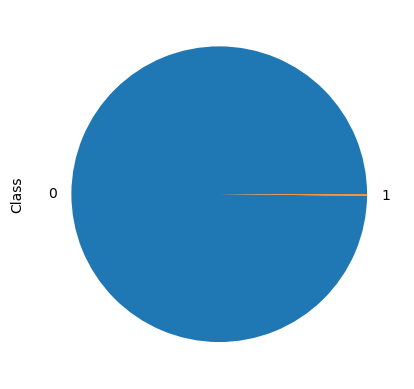

In [21]:
((df.groupby('Class')['Class'].count()/df['Class'].count())*100).plot.pie()

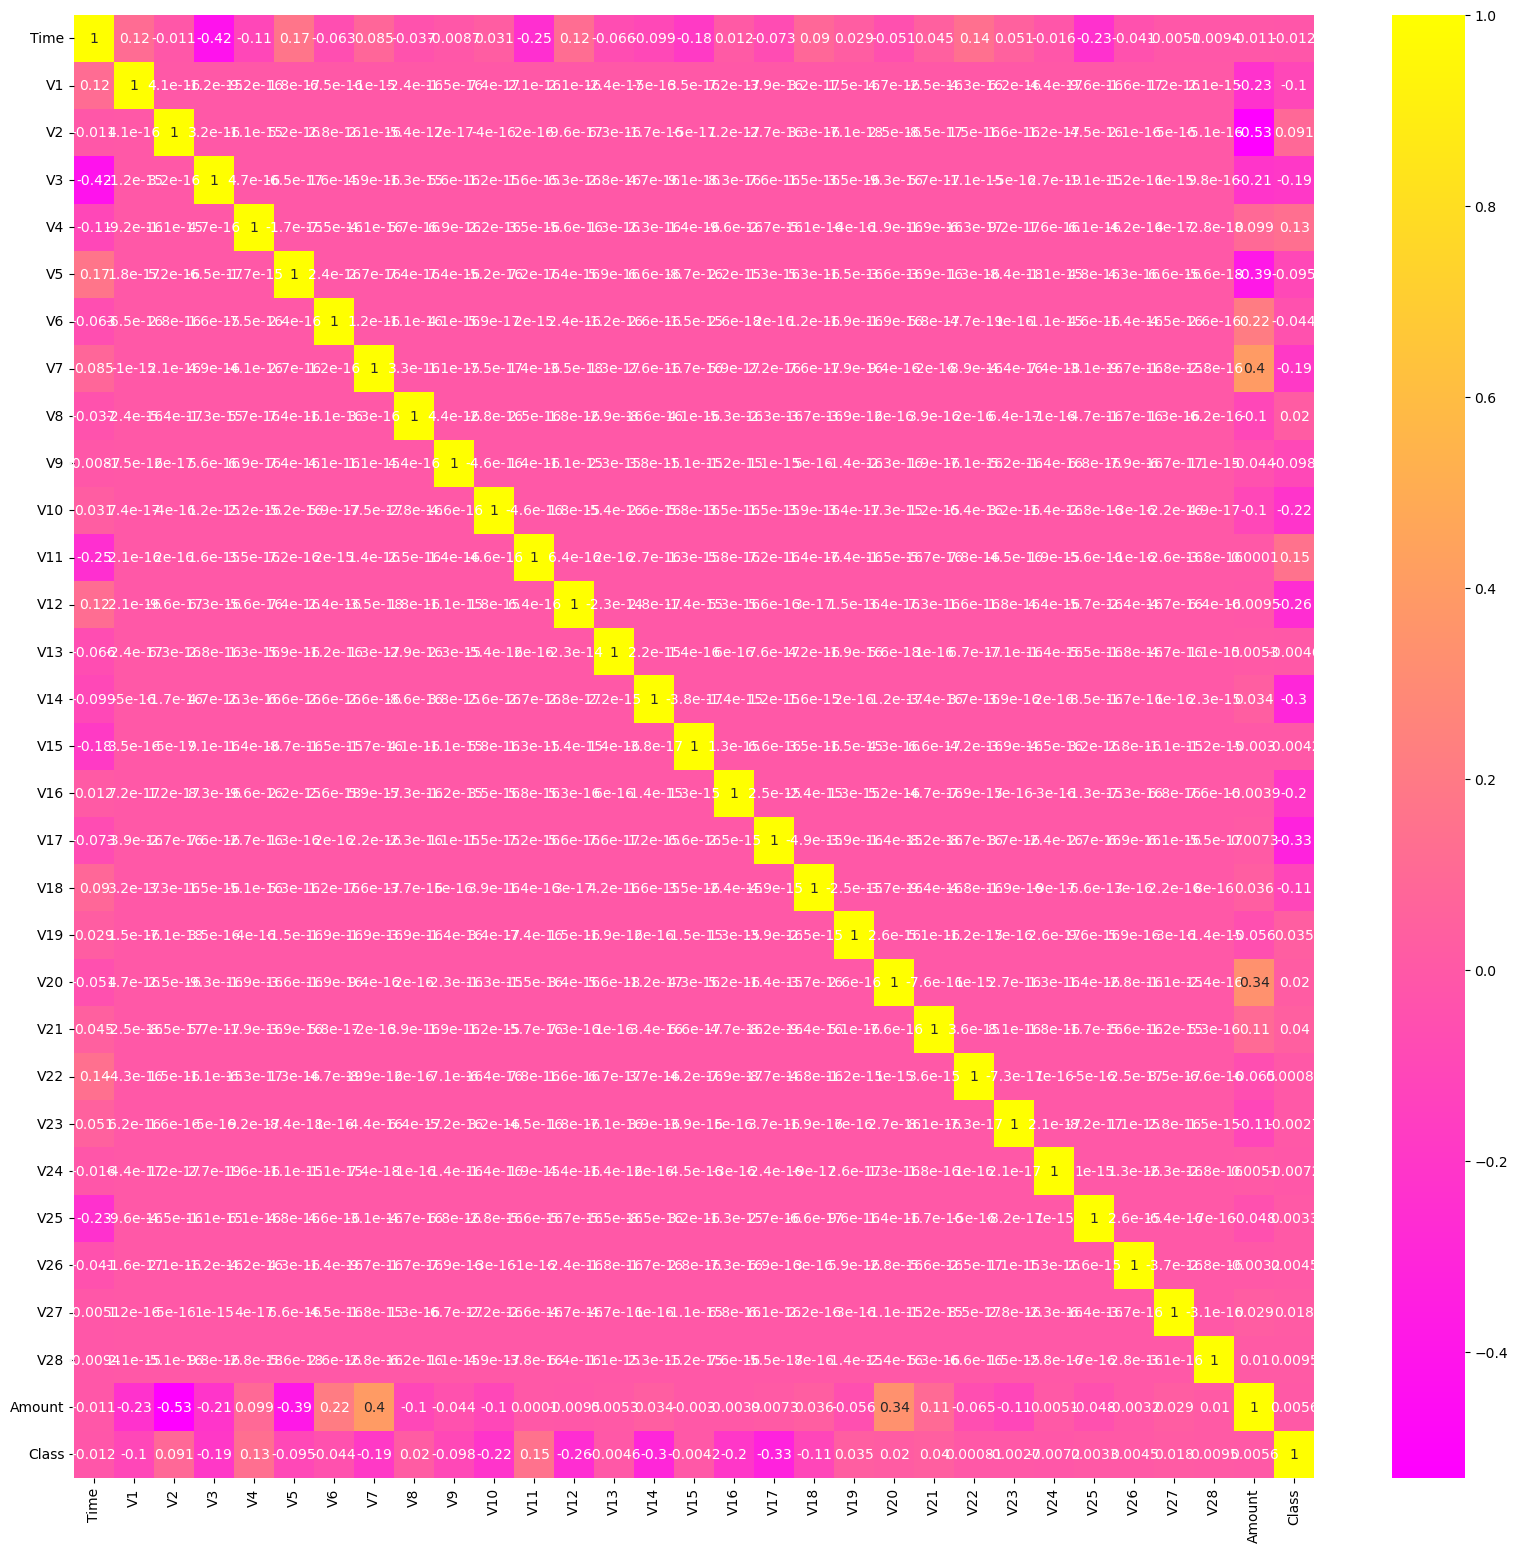

In [26]:
# plotting the heatmap for the correlation
corr = df.corr()

plt.figure(figsize=(20,19))
sns.heatmap(corr, cmap = 'spring', annot= True )
plt.yticks(rotation = 0)
plt.show()

In [28]:
# separte the data according to type of transaction i.e. fraud or legit

legit = df[df.Class == 0]

fraud = df[df.Class == 1]

In [29]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [30]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [32]:
# we can observe that the mean amount spent for fraud transactions is actually more than for the legit ones

In [35]:
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,0.009824,-0.006576,0.010832,0.000189,0.012064,0.000161,0.007164,0.011535,0.003887,-0.001178,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,3.800173,-6.259393,-0.109334,-6.971723,-0.092929,-4.139946,-6.665836,-2.246308,0.680659,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [36]:
# there's a significant difference in the mean value for our normal transaction and mean value for our fraud transactions

In [ ]:
# now to balance the data for legit and fraud transaction value points 
# we will use sampling for creating a new dataset of normal transactions with 492 entries being selected randomly out of 284315

In [37]:
normal_sample = legit.sample(n=492)

In [38]:
# now merge the two datasets for fraud and legit transactions with equal number of sampl points

In [43]:
df_new = pd.concat([normal_sample, fraud], axis = 0) # axis =0 species row wise joining of the datasets 

In [42]:
df_new

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
122838,76705.0,-0.426726,0.662286,1.076512,0.045905,-0.276862,0.303263,-0.866536,-2.405430,0.385036,-1.452420,-1.274180,-0.196251,-2.365448,0.565311,-1.200365,0.244498,-0.173206,-0.767681,-2.365216,0.160310,-1.323630,0.261371,-0.090970,0.020257,1.025450,-0.528337,0.070723,0.226897,10.00,0
64226,51081.0,-1.839214,1.375051,1.386679,4.228531,-0.646094,1.784022,-0.198545,1.051406,-2.469356,1.068557,-0.058126,0.311445,1.519788,0.509583,0.988064,1.283094,-0.495398,1.306729,1.521500,-0.024861,0.098628,0.108428,0.019192,-0.823520,0.039351,0.341879,-0.208271,-0.249178,126.38,0
132702,80084.0,0.112399,0.308416,1.769795,1.368444,-0.428322,0.400141,-0.006661,0.265239,0.835590,-0.657932,-0.789017,1.482369,0.732917,-1.086258,-2.150426,-1.302848,0.767207,-1.460927,0.002279,-0.142400,-0.281495,-0.319959,0.247240,0.405816,-0.474607,-0.674538,0.076554,-0.049632,17.90,0
282691,171071.0,2.016949,-0.029510,-1.854275,0.582068,0.258988,-0.676509,-0.086430,-0.051438,0.759234,-0.471347,0.514851,0.070196,-1.239861,-1.319164,-0.974131,0.498357,0.878611,0.955898,0.352909,-0.221233,-0.022642,0.165390,-0.023087,-0.590008,0.087102,0.652028,-0.052456,-0.046995,6.99,0
27617,34628.0,-0.548059,1.032392,0.871847,1.026166,2.384382,4.243484,-0.243665,1.070463,-1.260366,0.494598,-0.405740,-0.604467,0.102071,0.107637,1.182256,0.968861,-1.009841,0.604928,0.106778,0.127082,-0.030392,-0.348267,-0.148289,0.970208,-0.129931,-0.065697,-0.010481,0.112233,4.69,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,2.115795,-5.417424,-1.235123,-6.665177,0.401701,-2.897825,-4.570529,-1.315147,0.391167,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,2.858466,-3.096915,-0.792532,-5.210141,-0.613803,-2.155297,-3.267116,-0.688505,0.737657,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,1.794969,-2.775022,-0.418950,-4.057162,-0.712616,-1.603015,-5.035326,-0.507000,0.266272,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,1.933520,-5.030465,-1.127455,-6.416628,0.141237,-2.549498,-4.614717,-1.478138,-0.035480,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [45]:
df_new['Class'].value_counts()
# class is balanced

0    492
1    492
Name: Class, dtype: int64

In [46]:
# here we can drop the time feature and instead use a derived column using timedelta function of pandas to represent the
# duration that is difference between two time values
delta_time = pd.to_timedelta(df_new['Time'], unit = 's')
# create the derived column
df_new['time_hour']=(delta_time.dt.components.hours).astype(int)
# now drop the time column
df_new.drop(columns='Time', axis=1, inplace = True)

In [47]:
df_new.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,time_hour
122838,-0.426726,0.662286,1.076512,0.045905,-0.276862,0.303263,-0.866536,-2.405430,0.385036,-1.452420,-1.274180,-0.196251,-2.365448,0.565311,-1.200365,0.244498,-0.173206,-0.767681,-2.365216,0.160310,-1.323630,0.261371,-0.090970,0.020257,1.025450,-0.528337,0.070723,0.226897,10.00,0,21
64226,-1.839214,1.375051,1.386679,4.228531,-0.646094,1.784022,-0.198545,1.051406,-2.469356,1.068557,-0.058126,0.311445,1.519788,0.509583,0.988064,1.283094,-0.495398,1.306729,1.521500,-0.024861,0.098628,0.108428,0.019192,-0.823520,0.039351,0.341879,-0.208271,-0.249178,126.38,0,14
132702,0.112399,0.308416,1.769795,1.368444,-0.428322,0.400141,-0.006661,0.265239,0.835590,-0.657932,-0.789017,1.482369,0.732917,-1.086258,-2.150426,-1.302848,0.767207,-1.460927,0.002279,-0.142400,-0.281495,-0.319959,0.247240,0.405816,-0.474607,-0.674538,0.076554,-0.049632,17.90,0,22
282691,2.016949,-0.029510,-1.854275,0.582068,0.258988,-0.676509,-0.086430,-0.051438,0.759234,-0.471347,0.514851,0.070196,-1.239861,-1.319164,-0.974131,0.498357,0.878611,0.955898,0.352909,-0.221233,-0.022642,0.165390,-0.023087,-0.590008,0.087102,0.652028,-0.052456,-0.046995,6.99,0,23
27617,-0.548059,1.032392,0.871847,1.026166,2.384382,4.243484,-0.243665,1.070463,-1.260366,0.494598,-0.405740,-0.604467,0.102071,0.107637,1.182256,0.968861,-1.009841,0.604928,0.106778,0.127082,-0.030392,-0.348267,-0.148289,0.970208,-0.129931,-0.065697,-0.010481,0.112233,4.69,0,9


# separating the features and target variables

In [48]:
x = df_new.drop('Class', axis=1)
y = df_new['Class']

# splitting the data into training and testing data

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 3, stratify = y)

In [50]:
#accumulating all the column names under one variable
cols = list(x.columns.values)

array(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'time_hour'], dtype=object)

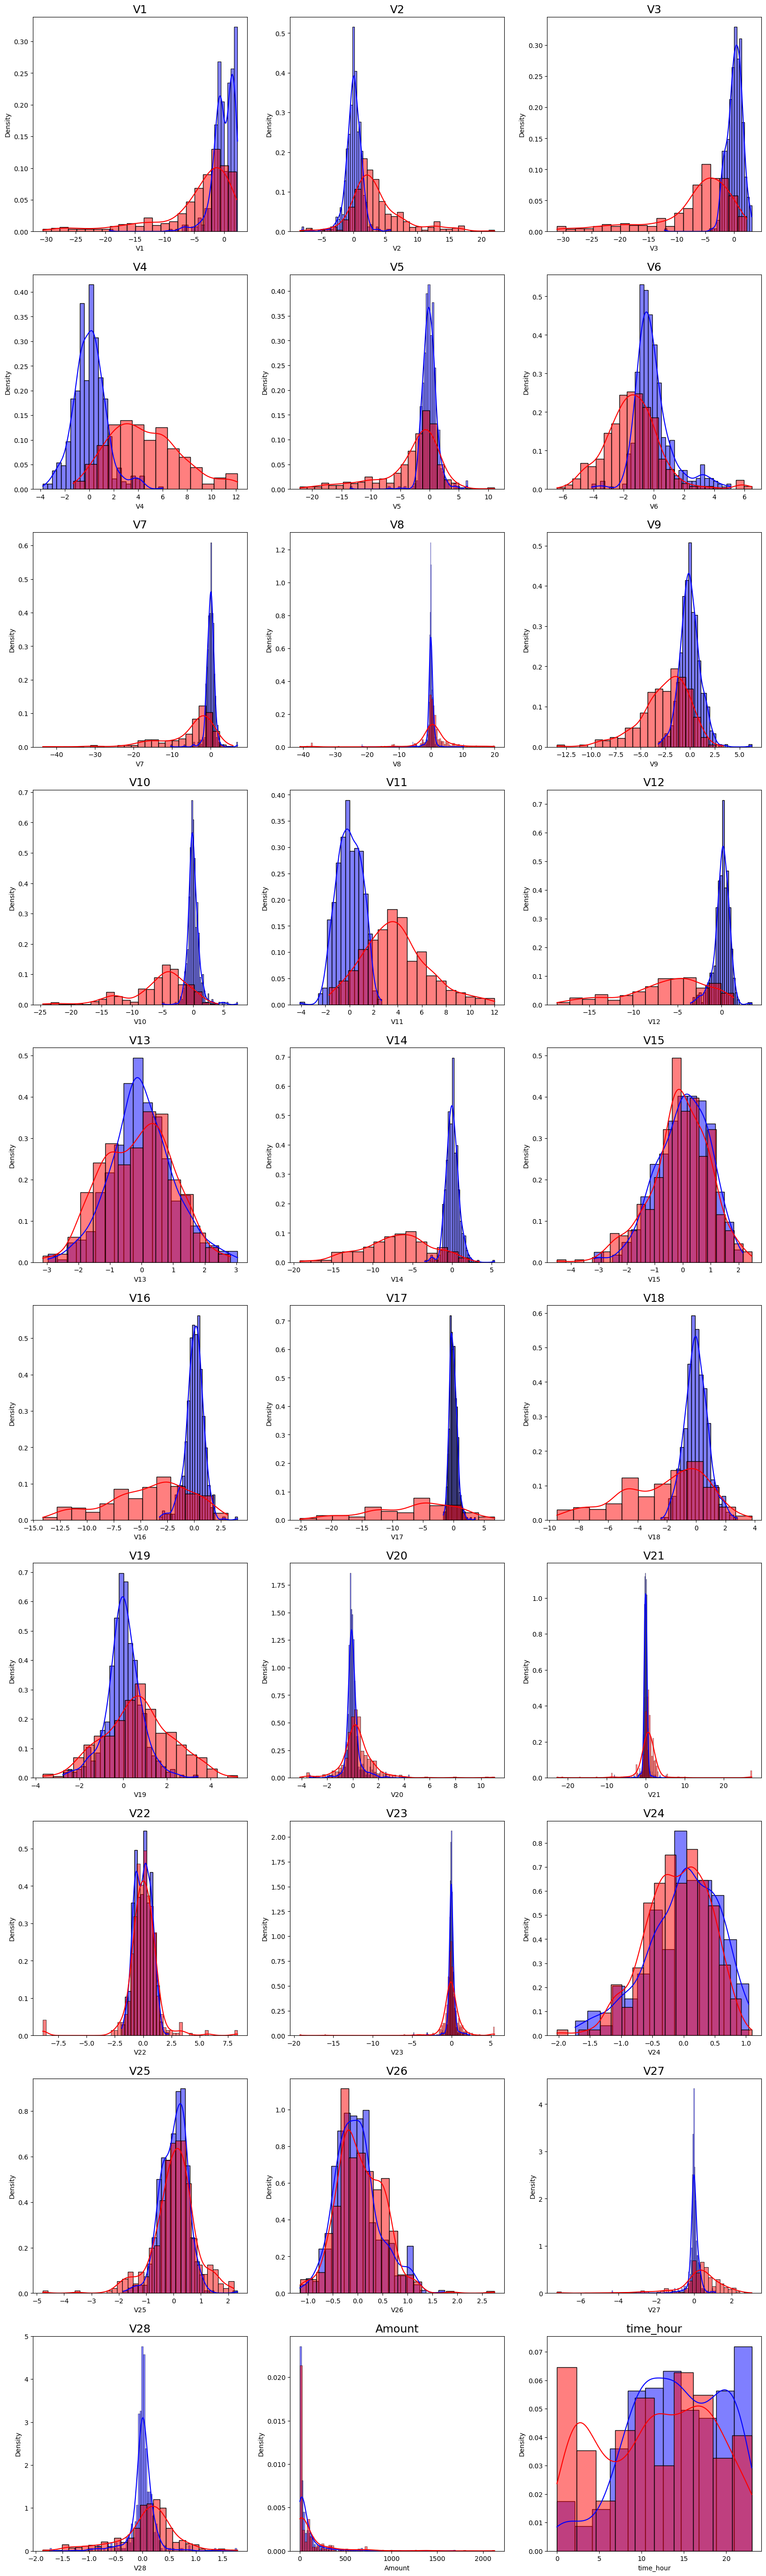

In [60]:
normal_entries = df_new.Class==0
fraud_entries = df_new.Class==1

plt.figure(figsize=(20,70))
for n, col in enumerate(cols):
    plt.subplot(10,3,n+1)
    sns.histplot(x[col][normal_entries], color='blue', kde = True, stat = 'density')
    sns.histplot(x[col][fraud_entries], color='red', kde = True, stat = 'density')
    plt.title(col, fontsize=17)
plt.show()

In [62]:
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [63]:
# accuracy on training data
acc_score= round(accuracy_score(y_pred_train, y_train)*100,2)

In [65]:
print('the accuracy score for training data of our model is :', acc_score)

the accuracy score for training data of our model is : 95.53


In [70]:
acc_score = round(accuracy_score(y_pred_test, y_test)*100,2)

In [71]:
print('the accuracy score for training data of our model is :', acc_score)

the accuracy score for training data of our model is : 92.68


In [72]:
class_report = classification_report(y_pred_test, y_test)
print('classification report of our model: ', class_report)

classification report of our model:                precision    recall  f1-score   support

           0       0.94      0.91      0.93       127
           1       0.91      0.94      0.93       119

    accuracy                           0.93       246
   macro avg       0.93      0.93      0.93       246
weighted avg       0.93      0.93      0.93       246



In [ ]:
# we have achieved a model with decent accuracy score